In [24]:
%load_ext autoreload
%autoreload 2

import sys
import importlib
import numpy as np
from prondict import *
from lab2_proto import *
from lab2_tools import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 4)
np.set_printoptions(precision=3)
#importlib.import_module(lab2_proto)
#importlib.reload(lab2_proto)
#print("no")
#modules = sys.modules.values()
#print(modules)
#for module in modules:
#    try:
#        imp.reload(module)
#    except:
#        print(module, " could not be reloaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#load data
data = np.load('lab2_data.npz', allow_pickle=True)['data']

#phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
phoneHMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()

In [3]:
# isolate the prondict 

isolated = {}
for pron in prondict.keys():
    isolated[pron] = ['sil']+prondict[pron]+['sil']
    

# concatenation HMM

In [8]:
wordHMMs = {}
wordHMMs['o'] = concatHMMs(phoneHMMs, isolated['o'])

print(wordHMMs['o']['transmat'])

print(wordHMMs['o']['means'].shape)
print(wordHMMs['o']['covars'].shape)

[[0.883 0.117 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.916 0.084 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.803 0.197 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.815 0.185 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.844 0.156 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.866 0.134 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.883 0.117 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.916 0.084 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.803 0.197]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]
(9, 13)
(9, 13)


## load the example

In [5]:
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()
#list(example.keys())


# HMMs

## Gaussian Emission

(9, 13)  

  (9, 13)
False


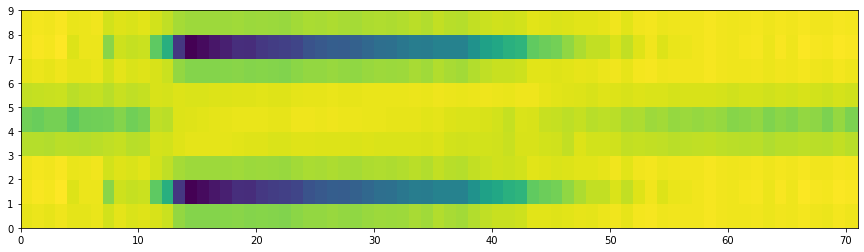

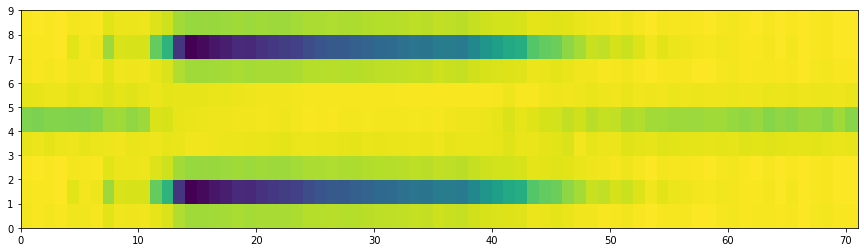

In [38]:
logProb = log_multivariate_normal_density_diag(example['lmfcc'], wordHMMs['o']['means'], wordHMMs['o']['covars'])

#print(wordHMMs['o']['means']," \n\n ", wordHMMs['o']['covars'])
print(wordHMMs['o']['means'].shape," \n\n ", wordHMMs['o']['covars'].shape)

print(np.allclose(logProb, example['obsloglik']))

plt.pcolormesh(logProb.T)
plt.show()
plt.pcolormesh(example['obsloglik'].T)
plt.show()

## alpha pass

[-86.361    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
False


/home/dominik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


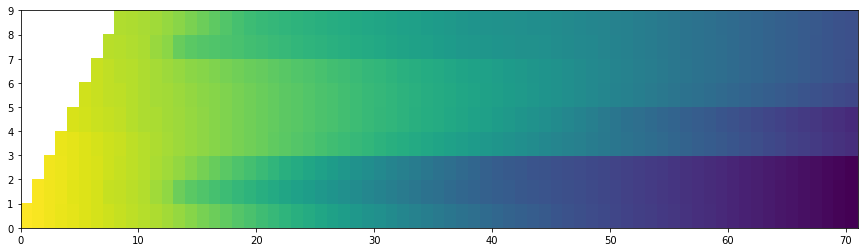

[-86.361    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]


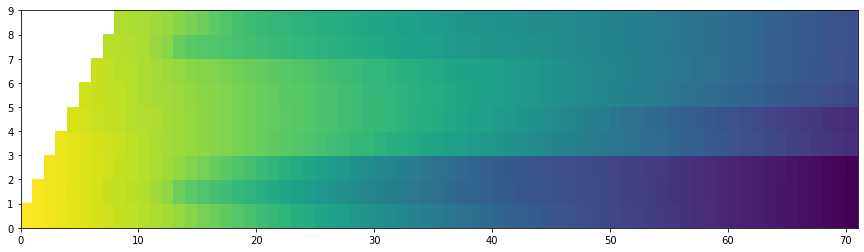

In [37]:
alphas = forward(example['obsloglik'], np.log(wordHMMs['o']['startprob']), np.log(wordHMMs['o']['transmat']))

#print(alphas)
print(np.allclose(alphas, example['logalpha']))

plt.pcolormesh(alphas.T)
plt.show()
plt.pcolormesh(example['logalpha'].T)
print(example['logalpha'][0])
plt.show()

# betapass

False


/home/dominik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


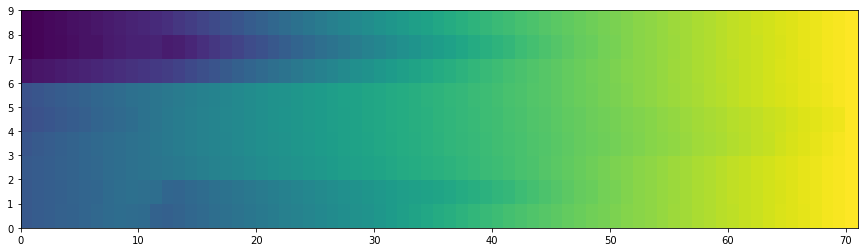

[-5884.066 -5881.124 -5879.146 -5967.011 -6082.88  -6080.817 -7765.943
 -8134.503 -8132.525]


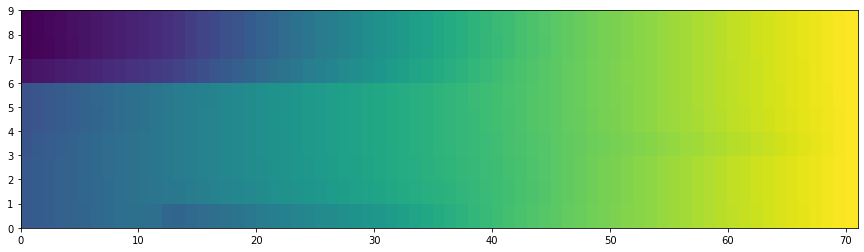

In [44]:
betas = backward(example['obsloglik'], np.log(wordHMMs['o']['startprob']), np.log(wordHMMs['o']['transmat']))

#print(alphas)
print(np.allclose(betas, example['logalpha']))

plt.pcolormesh(betas.T)
plt.show()
plt.pcolormesh(example['logbeta'].T)
#print(example['logbeta'][0])
plt.show()

# Viterbi

-5974.211288357338
-5974.237978685437


/home/dominik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


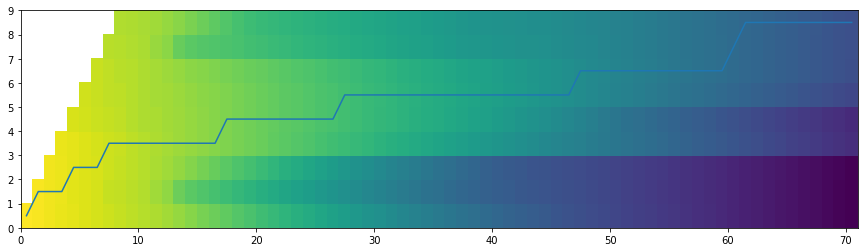

In [69]:
prob, path = viterbi(example['obsloglik'], np.log(wordHMMs['o']['startprob']), np.log(wordHMMs['o']['transmat']))
path = np.array(path)
print(example['vloglik'])
print(prob)
#print(len(path))
plt.pcolormesh(alphas.T)
plt.plot(np.arange(0.5, path.shape[0], 1), path+0.5)
plt.show()